In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
file_path = "best.csv"
data = pd.read_csv(file_path, delimiter=';', encoding='latin1')
data.head()

,Artist,Album Name,Genre,Release Date,Favourite Song,Rating
0,Portishead,Dummy,Trip Hop,22.04.1994,Roads,10
1,Björk,Homogenic,"Art Pop, Electronic",22.09.1997,Bachelorette,10
2,Madonna,Ray of Light,"Downtempo, Art Pop",26.02.1998,Little Star,10
3,Deltron 3030,Deltron 3030,"West Coast Hip Hop, Abstract Hip Hop, Experime...",23.05.2000,3030,10
4,PJ Harvey,"Stories From The City, Stories From The Sea","Alternative Rock, Singer-Songwriter",24.10.2000,We Float,10


In [11]:
data.isnull().sum()

Artist             0
Album Name         0
Genre              0
Release Date       0
Favourite Song    12
Rating             0
dtype: int64

In [12]:
data['Favourite Song'] = data['Favourite Song'].fillna("Unknown")
data['Release Date'] = pd.to_datetime(data['Release Date'], format='%d.%m.%Y', errors='coerce')
data['Genre'] = data['Genre'].str.strip()
data['Genre List'] = data['Genre'].str.split(', ')
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['Year'] = data['Release Date'].dt.year
data['Month'] = data['Release Date'].dt.month
data['Day'] = data['Release Date'].dt.day
print(data[['Release Date', 'Year', 'Month', 'Day']].head())


  Release Date  Year  Month  Day
0   1994-04-22  1994      4   22
1   1997-09-22  1997      9   22
2   1998-02-26  1998      2   26
3   2000-05-23  2000      5   23
4   2000-10-24  2000     10   24


In [13]:
print("Basic Dataset Information:")
print(data.info())
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

Basic Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Artist          113 non-null    object        
 1   Album Name      113 non-null    object        
 2   Genre           113 non-null    object        
 3   Release Date    113 non-null    datetime64[ns]
 4   Favourite Song  113 non-null    object        
 5   Rating          44 non-null     float64       
 6   Genre List      113 non-null    object        
 7   Year            113 non-null    int32         
 8   Month           113 non-null    int32         
 9   Day             113 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(3), object(5)
memory usage: 7.6+ KB
None

Summary Statistics for Numerical Columns:
                        Release Date     Rating         Year       Month  \
count                            113  4

In [14]:
# plt.figure(figsize=(8,5))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title("Correlation Matrix")
# plt.show()

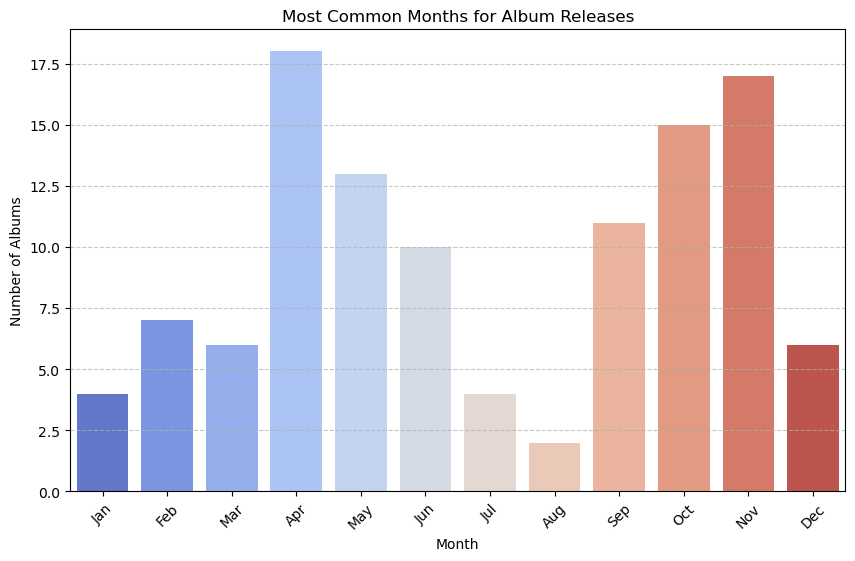

In [15]:
month_counts = data['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="coolwarm")
plt.title("Most Common Months for Album Releases")
plt.xlabel("Month")
plt.ylabel("Number of Albums")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

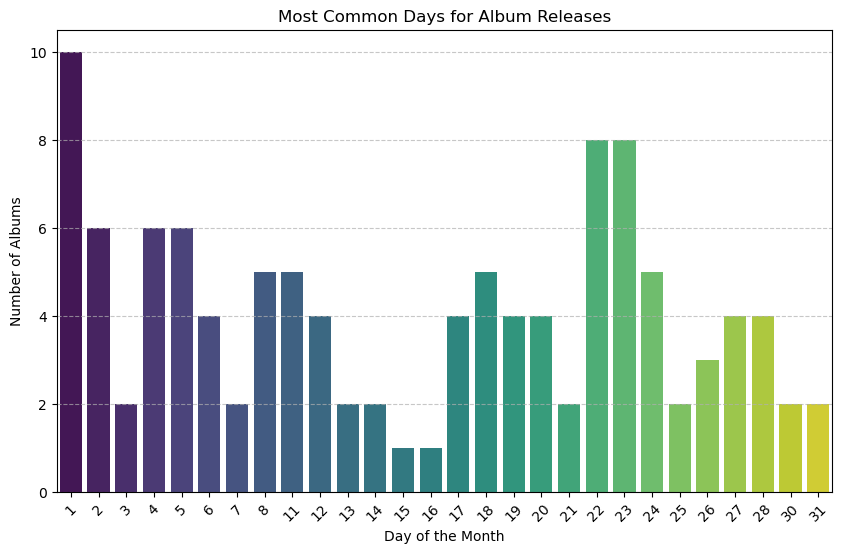

In [16]:
day_counts = data['Day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")
plt.title("Most Common Days for Album Releases")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Albums")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


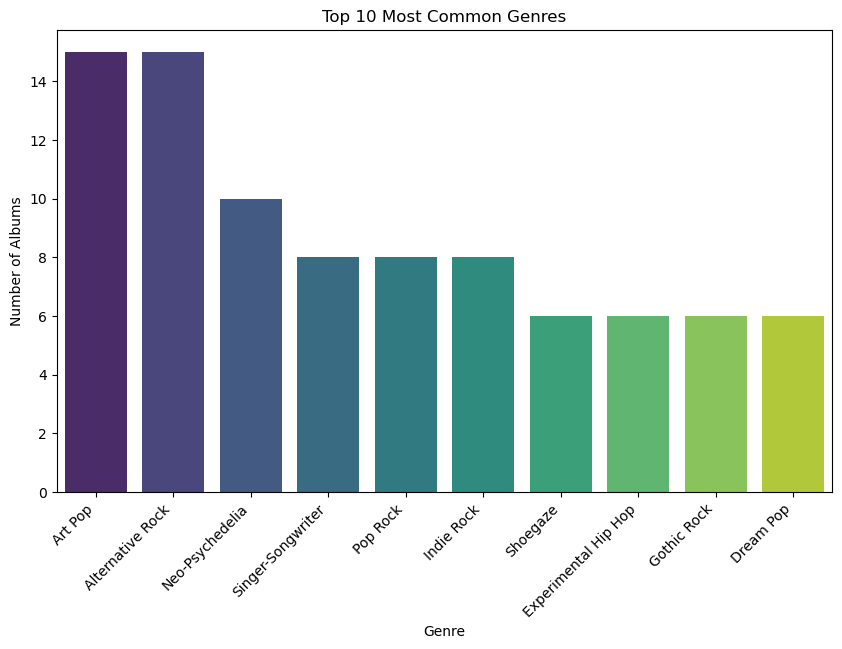

In [17]:
genre_counts = data['Genre List'].explode().value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.head(10).index, y=genre_counts.head(10).values, palette="viridis")
plt.title("Top 10 Most Common Genres")
plt.ylabel("Number of Albums")
plt.xlabel("Genre")
plt.xticks(rotation=45, ha='right')
plt.show()


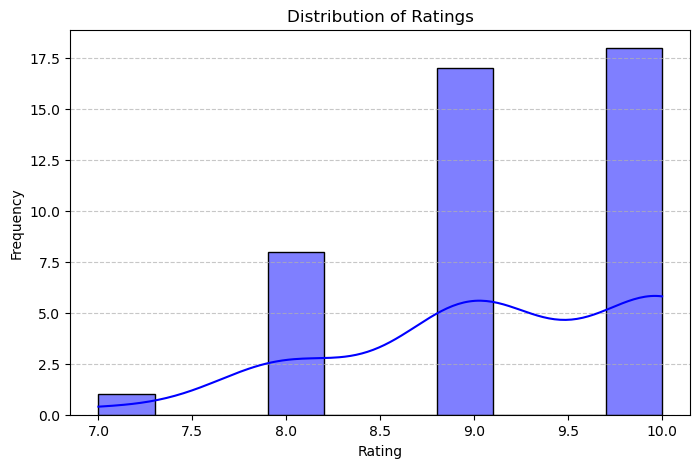

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=10, kde=True, color='blue', edgecolor='black')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


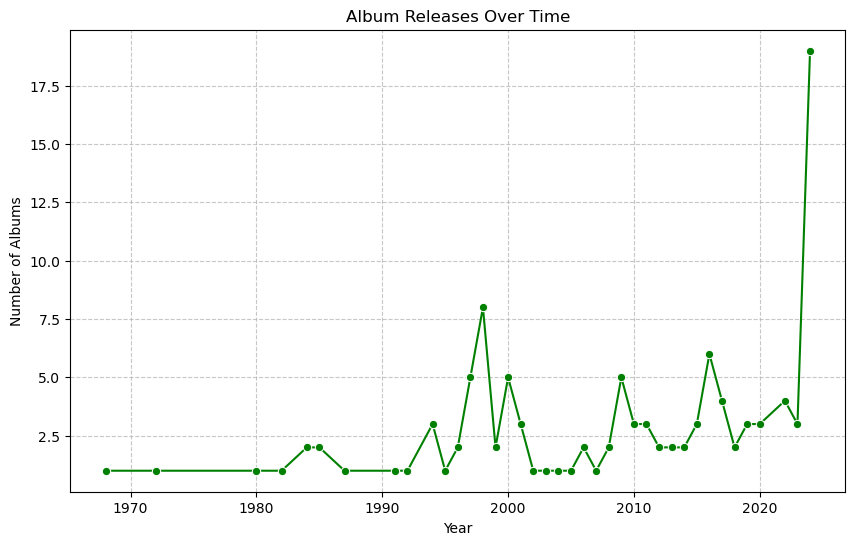

In [19]:
release_trends = data['Release Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=release_trends.index, y=release_trends.values, marker='o', color='green')
plt.title("Album Releases Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Albums")
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

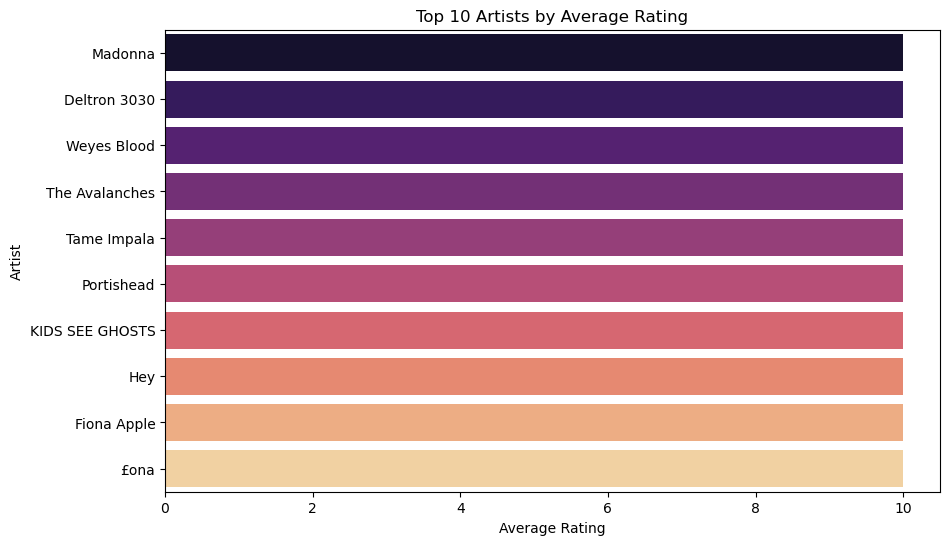

In [20]:
artist_ratings = data.groupby('Artist')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=artist_ratings.values, y=artist_ratings.index, palette="magma")
plt.title("Top 10 Artists by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Artist")
plt.show()


ValueError: cannot reindex on an axis with duplicate labels

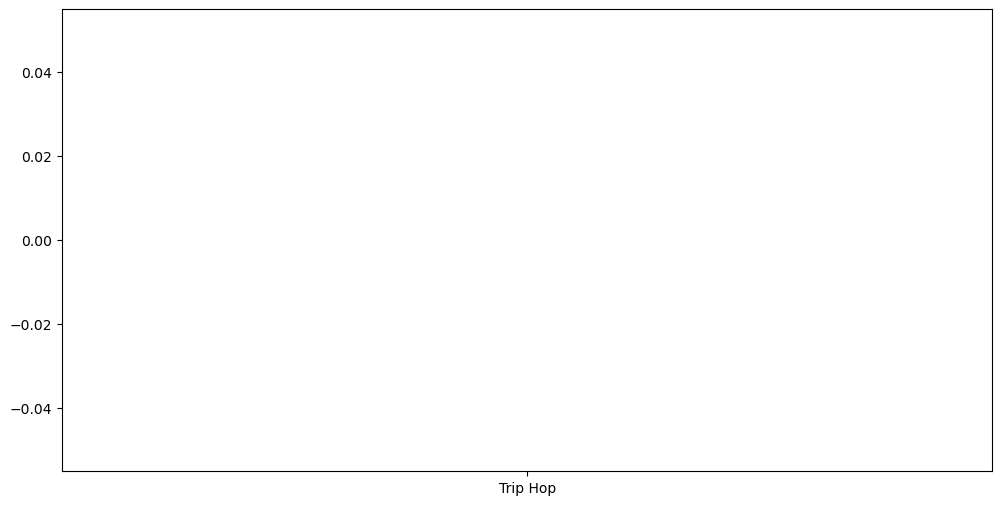

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='Rating', x='Genre', data=data.explode('Genre List'), palette='coolwarm')
plt.title("Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
print("\nInsights:")
print(f"1. The most frequent rating is: {data['Rating'].mode()[0]}")
print(f"2. The most popular genre is: {genre_counts.idxmax()} with {genre_counts.max()} albums.")
print("3. Top Artists by Rating:")
print(artist_ratings)
print(f"4. Album releases peaked in {release_trends.idxmax()} with {release_trends.max()} albums.")



Insights:
1. The most frequent rating is: 10.0
2. The most popular genre is: Art Pop with 15 albums.
3. Top Artists by Rating:
Artist
Madonna            10.0
Deltron 3030       10.0
Weyes Blood        10.0
The Avalanches     10.0
Tame Impala        10.0
Portishead         10.0
KIDS SEE GHOSTS    10.0
Hey                10.0
Fiona Apple        10.0
£ona               10.0
Name: Rating, dtype: float64
4. Album releases peaked in 2024 with 19 albums.
